In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
bank = pd.read_csv('bank-full.csv',sep =';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank['y'] = bank['y'].map ({'yes':1,'no':0})
bank['default'] = bank['default'].map ({'yes':1,'no':0})
bank ['housing'] = bank['housing'].map ({'yes':1,'no':0})
bank ['loan'] = bank['loan'].map ({'yes':1,'no':0})

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [6]:
bank1 = bank.copy()

In [7]:
bank1 = bank1.drop(['job','marital','education','contact','poutcome','month'],axis =1)

In [8]:
bank1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0


In [9]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   default   45211 non-null  int64
 2   balance   45211 non-null  int64
 3   housing   45211 non-null  int64
 4   loan      45211 non-null  int64
 5   day       45211 non-null  int64
 6   duration  45211 non-null  int64
 7   campaign  45211 non-null  int64
 8   pdays     45211 non-null  int64
 9   previous  45211 non-null  int64
 10  y         45211 non-null  int64
dtypes: int64(11)
memory usage: 3.8 MB


In [10]:
bank1.shape

(45211, 11)

In [11]:
bank1.isnull().sum()

age         0
default     0
balance     0
housing     0
loan        0
day         0
duration    0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

In [12]:
# Dividing our data into input and output variables
x = bank1.iloc[:,0:10]
y = bank1.iloc[:,10]
print (y)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# identify/define Classifier
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [15]:
#Predictfor X dataset
y_pred = classifier.predict(x)

In [16]:
print (classifier.predict(x))

[0 0 0 ... 0 0 0]


In [17]:
new = pd.DataFrame ({'actual': y , 'Predicted_prob': classifier.predict(x)})

In [18]:
y_pred_df=pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x)})

In [19]:
y_pred_df.head()

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [20]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix (y,y_pred)
print (confusion_matrix)

[[39219   703]
 [ 4309   980]]


In [21]:
# Check the Accuracy
((39219+980)/(39219+703+4309+980))*100

88.91420229590143

In [22]:
#Classification report 
from sklearn.metrics import classification_report
print (classification_report (y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.19      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.58      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [23]:
classifier.predict_proba(x)

array([[0.93746141, 0.06253859],
       [0.93956699, 0.06043301],
       [0.95079608, 0.04920392],
       ...,
       [0.59735305, 0.40264695],
       [0.91104313, 0.08895687],
       [0.79400226, 0.20599774]])

In [24]:
#ROC and AUC curve

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Text(0, 0.5, 'True Positive Rate')

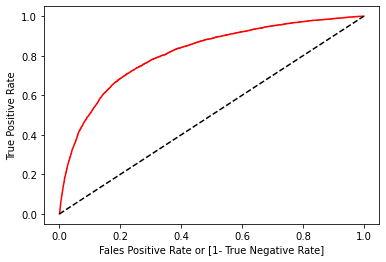

In [30]:
fpr,tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

auc =roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='red', label='logit model (area =%0.2f )'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('Fales Positive Rate or [1- True Negative Rate]')
plt.ylabel('True Positive Rate')